# Building and Visualizing a CNN 

### Set random seeds to weights

In [1]:

import random as rn
import numpy as np
import tensorflow as tf


In [2]:
import os
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [3]:
np.random.seed(43)
rn.seed(5142)
tf.random.set_seed(26)

### Import Tensorflow, Keras, Tensorboard and other utility functions

In [2]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tf_explain.callbacks.activations_visualization import ActivationsVisualizationCallback
from tensorflow.keras.utils import to_categorical
from keras.callbacks import TensorBoard

import matplotlib.pyplot as plt


physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


### Load the Cifar 10 data set

In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 
           'bird', 'cat', 'deer', 'dog', 
       'frog', 'horse', 'ship', 'truck']

num_classes = len(class_names)

### Preprocess The Data

In [17]:
#Rescale  the images into the range between [0,1]

train_images = train_images / 255.0
train_labels = to_categorical(train_labels, num_classes)

test_images = test_images / 255.0
test_labels = to_categorical(test_labels, num_classes)


### Define a visualization that takes dataset and plots

In [18]:
def visualize_data(images, categories, class_names):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        class_index = categories[i].argmax()
        plt.xlabel(class_names[class_index])
    plt.show()

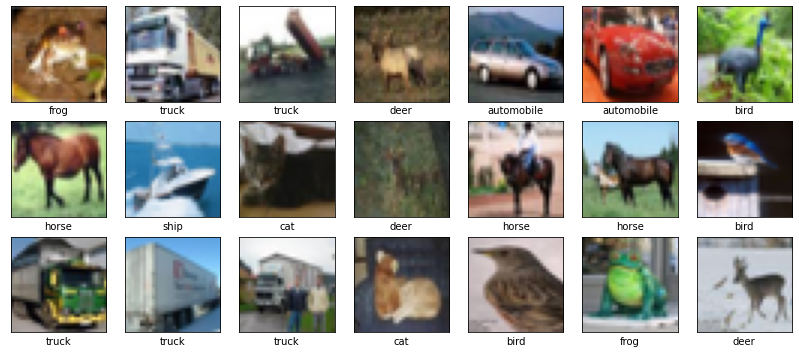

In [19]:
visualize_data(train_images, train_labels, class_names)

### Building a common CNN using the Keras Sequential API

In [24]:
#Create Convolutional base Conv2D and Maxpooling2D layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [25]:
# Adding Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [26]:
#Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
#Fitting the model
#loss: 0.9075 - accuracy: 0.7012 Test accuracy: 0.701200008392334
model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7684 - accuracy: 0.3569 - val_loss: 1.5231 - val_accuracy: 0.4426
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4430 - accuracy: 0.4806 - val_loss: 1.3616 - val_accuracy: 0.5102
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3439 - accuracy: 0.5226 - val_loss: 1.3009 - val_accuracy: 0.5399
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2771 - accuracy: 0.5468 - val_loss: 1.2423 - val_accuracy: 0.5560
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2189 - accuracy: 0.5699 - val_loss: 1.1940 - val_accuracy: 0.5765
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1698 - accuracy: 0.5904 - val_loss: 1.1693 - val_accuracy: 0.5914
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1262 - accuracy: 0.6061 - val_loss: 1.1048 - val_accuracy:

# Data Augmentation

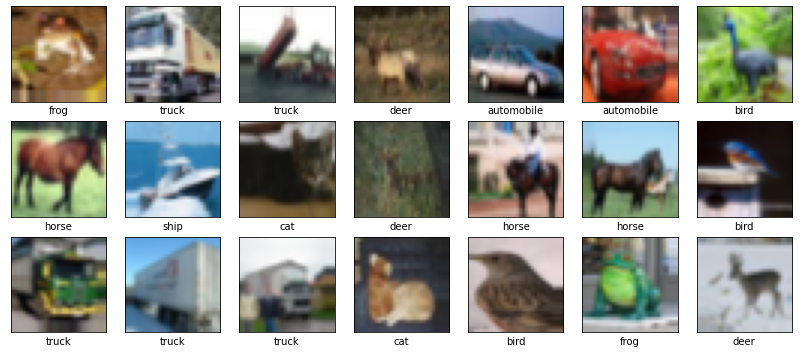

In [20]:
width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
datagen.fit(train_images)

it = datagen.flow(train_images, train_labels, shuffle=False)
batch_images, batch_labels = next(it)
visualize_data(batch_images, batch_labels, class_names)

### Creating a VGG style convolutional neural network classifier.

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()



In [ ]:
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [17]:
datagen.fit(train_images)
model.fit(datagen.flow(train_images, train_labels,batch_size=32),
          epochs=16, validation_data = (test_images,  test_labels))

Epoch 1/16
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6672 - accuracy: 0.3828 - val_loss: 1.3337 - val_accuracy: 0.5033
Epoch 2/16
1563/1563 [==============================] - 20s 12ms/step - loss: 1.2094 - accuracy: 0.5664 - val_loss: 1.0042 - val_accuracy: 0.6412
Epoch 3/16
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0268 - accuracy: 0.6319 - val_loss: 0.9776 - val_accuracy: 0.6571
Epoch 4/16
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9186 - accuracy: 0.6739 - val_loss: 0.9021 - val_accuracy: 0.6832
Epoch 5/16
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8390 - accuracy: 0.7030 - val_loss: 0.8516 - val_accuracy: 0.7048
Epoch 6/16
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7846 - accuracy: 0.7241 - val_loss: 0.7973 - val_accuracy: 0.7274
Epoch 7/16
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7472 - accuracy: 0.7366 - val_loss: 0.7529 -

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.7006 - accuracy: 0.7681

Test accuracy: 0.7681000232696533


### Adding Dropout Layer

In [21]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
model.add(layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))


model.add(layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu",name='visualization_layer'))
model.add(layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))


model.add(layers.Flatten())

# Droput Layer
model.add(layers.Dropout(0.5,noise_shape=None,seed=None))

# Adding the first fully connected layer
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
visualization_layer (Conv2D) (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [22]:
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [23]:
datagen.fit(train_images)
model.fit(datagen.flow(train_images, train_labels,batch_size=32),
          epochs=16, validation_data = (test_images,  test_labels))

Epoch 1/16
1563/1563 [==============================] - 21s 14ms/step - loss: 1.5212 - accuracy: 0.4443 - val_loss: 1.1270 - val_accuracy: 0.5927
Epoch 2/16
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1398 - accuracy: 0.5944 - val_loss: 0.9878 - val_accuracy: 0.6511
Epoch 3/16
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0111 - accuracy: 0.6403 - val_loss: 0.8292 - val_accuracy: 0.7072
Epoch 4/16
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9263 - accuracy: 0.6725 - val_loss: 0.8654 - val_accuracy: 0.6946
Epoch 5/16
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8758 - accuracy: 0.6923 - val_loss: 0.7672 - val_accuracy: 0.7307
Epoch 6/16
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8329 - accuracy: 0.7082 - val_loss: 0.7632 - val_accuracy: 0.7402
Epoch 7/16
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8036 - accuracy: 0.7171 - val_loss: 0.7539 -

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5849 - accuracy: 0.7969

Test accuracy: 0.7968999743461609


Without Data augmentation
13/313 - 1s - loss: 0.6924 - accuracy: 0.7786
Test accuracy: 0.7785999774932861

With Data augmentation
313/313 - 1s - loss: 0.5968 - accuracy: 0.7971
Test accuracy: 0.7971000075340271

# Visualize a Conv filter

### Visualizing the model that got the best accuracy

In [25]:
#Define modifier to replace the model output to target layer's output that has filters you want to visualize.
layer_name = 'visualization_layer' 

def model_modifier(current_model):
    target_layer = current_model.get_layer(name=layer_name)
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    return new_model

### Create Activation Maximization

In [26]:
#Create ActivationMaximization
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model,
                                                 model_modifier,
                                                 clone=False)

In [27]:
filter_number = 3
def loss(output):
    return output[..., filter_number]

Steps: 050	Losses: [[-14.974047660827637]],	Regularizations: [('TotalVariation', 77.88092041015625), ('L2Norm', 0.18021783232688904)]
Steps: 100	Losses: [[-8.05931568145752]],	Regularizations: [('TotalVariation', 37.53899002075195), ('L2Norm', 0.18030354380607605)]
Steps: 150	Losses: [[-11.913867950439453]],	Regularizations: [('TotalVariation', 58.18778991699219), ('L2Norm', 0.18024703860282898)]
Steps: 200	Losses: [[-6.625696659088135]],	Regularizations: [('TotalVariation', 41.42087936401367), ('L2Norm', 0.18023237586021423)]
Steps: 250	Losses: [[-8.789387702941895]],	Regularizations: [('TotalVariation', 44.7244987487793), ('L2Norm', 0.18017111718654633)]
Steps: 300	Losses: [[-7.200466156005859]],	Regularizations: [('TotalVariation', 47.60301208496094), ('L2Norm', 0.18006658554077148)]
Steps: 350	Losses: [[-9.927517890930176]],	Regularizations: [('TotalVariation', 85.90279388427734), ('L2Norm', 0.1799500733613968)]
Steps: 400	Losses: [[-3.209038734436035]],	Regularizations: [('TotalVa

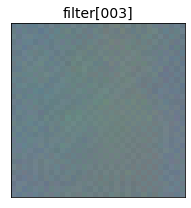

Wall time: 6.51 s


In [28]:
%%time
from tf_keras_vis.utils.callbacks import Print

# Generate max activation
activation = activation_maximization(loss,
                                     steps=512,
                                     callbacks=[Print(interval=50)])
image = activation[0].astype(np.uint8)

# Render
subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (3, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)
ax.imshow(image)
ax.set_title('filter[{:03d}]'.format(filter_number), fontsize=14)
plt.tight_layout()
plt.show()

## Visualize convolution filters



In [3]:
%reload_ext autoreload
%autoreload 2


%matplotlib inline

import tensorflow as tf




1 GPUs


### Visualizing a VGG16 model

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model
from tensorflow.keras.applications.vgg16 import preprocess_input


model = Model(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Modify the model

In [5]:
layer_name = 'block5_conv3' # The target layer that is the last layer of VGG16.

def model_modifier(current_model):
    target_layer = current_model.get_layer(name=layer_name)
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    return new_model

In [6]:

from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model,
                                                 model_modifier,
                                                 clone=False)

### Define Loss Function

In [7]:
filter_number = 3
def loss(output):
    return output[..., filter_number]

### Visualize

Steps: 050	Losses: [[430.0119323730469]],	Regularizations: [('TotalVariation', 112.58091735839844), ('L2Norm', 0.025511696934700012)]
Steps: 100	Losses: [[566.0215454101562]],	Regularizations: [('TotalVariation', 129.04776000976562), ('L2Norm', 0.025324329733848572)]
Steps: 150	Losses: [[620.6338500976562]],	Regularizations: [('TotalVariation', 133.46063232421875), ('L2Norm', 0.02517847716808319)]
Steps: 200	Losses: [[651.2181396484375]],	Regularizations: [('TotalVariation', 132.24826049804688), ('L2Norm', 0.02509317174553871)]
Steps: 250	Losses: [[688.4478759765625]],	Regularizations: [('TotalVariation', 136.28314208984375), ('L2Norm', 0.024995584040880203)]
Steps: 300	Losses: [[734.661376953125]],	Regularizations: [('TotalVariation', 138.40945434570312), ('L2Norm', 0.02489328384399414)]
Steps: 350	Losses: [[855.9614868164062]],	Regularizations: [('TotalVariation', 150.0651092529297), ('L2Norm', 0.02475861832499504)]
Steps: 400	Losses: [[892.6090698242188]],	Regularizations: [('TotalV

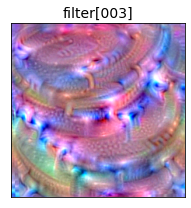

Wall time: 29.6 s


In [8]:

%%time
from tf_keras_vis.utils.callbacks import Print

# Generate max activation
activation = activation_maximization(loss,
                                     steps=512,
                                     callbacks=[Print(interval=50)])
image = activation[0].astype(np.uint8)

# Render
subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (3, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)
ax.imshow(image)
ax.set_title('filter[{:03d}]'.format(filter_number), fontsize=14)
plt.tight_layout()
plt.show()


### Visualize with GradCam Tf-keras-vis

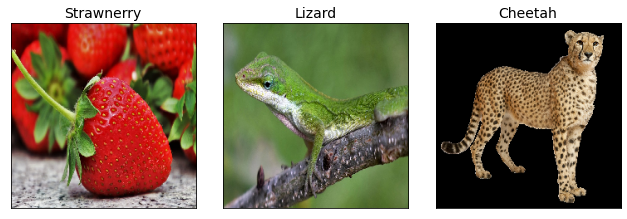

In [12]:
from tensorflow.keras.preprocessing.image import load_img

# Image titles
image_titles = ['Strawnerry', 'Lizard', 'Cheetah']

# Load images
img1 = load_img('/Users/joaqu/Pictures/3.png', target_size=(224, 224))
img2 = load_img('/Users/joaqu/Pictures/1.png', target_size=(224, 224))
img3 = load_img('/Users/joaqu/Pictures/5.png', target_size=(224, 224))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

X = preprocess_input(images)

# Rendering
subplot_args = { 'nrows': 1, 'ncols': 3, 'figsize': (9, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

In [13]:
# The `output` variable refer to the output of the model,
# so, in this case, `output` shape is `(3, 1000)` i.e., (samples, classes).
def loss(output):
    # 1 is the imagenet index corresponding to Goldfish, 294 to Bear and 413 to Assault Rifle.
    return (output[0][1], output[1][294], output[2][413])

In [14]:
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

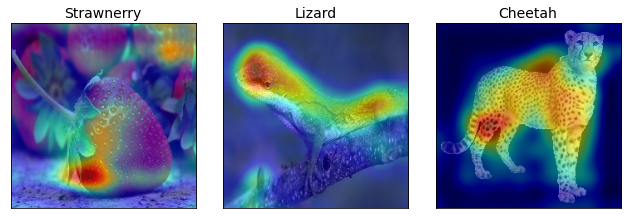

Wall time: 549 ms


In [15]:
%%time
from tensorflow.keras import backend as K
from tf_keras_vis.utils import normalize
from matplotlib import cm
from tf_keras_vis.gradcam import GradcamPlusPlus

# Create GradCAM++ object, Just only repalce class name to "GradcamPlusPlus"
# gradcam = Gradcam(model, model_modifier, clone=False)
gradcam = GradcamPlusPlus(model,
                          model_modifier,
                          clone=False)

# Generate heatmap with GradCAM++
cam = gradcam(loss,
              X,
              penultimate_layer=-1, # model.layers number
             )
cam = normalize(cam)

f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
plt.tight_layout()
plt.show()